# [이론1] 경사 하강법과 오차 역전파


---

## 학습 목표

- 경사 하강법을 이해한다.
- 오차 역전파를 이해한다.


---

## 목차

### [이론1] 경사 하강법과 오차 역전파

1. 경사 하강법
1. 오차 역전파


---

## [이론1] 경사 하강법과 오차 역전파

### 1. 경사 하강법

기계 학습은 학습 단계에서 최적의 매개 변수를 찾아냅니다. 신경망에서도 가중치(W)와 편향(b)을 담는 최적의 매개 변수를 찾아야 합니다.    
최적의 매개 변수는 손실 함수가 최솟값이 되게 하는 값입니다.    

손실 함수의 최솟값을 찾는다는 것은 쉬운 일은 아닙니다.

여기서는 기울기를 이용해서 최솟값을 찾는 과정을 살펴보겠습니다.


#### 함수의 기울기

우선 손실 함수를 복습합시다. 손실 함수는 측정 혹은 연산의 결과로 나온 값과 실제 값의 차이를 나타내는 정도입니다. 
<br>손실 함수에는 **평균 제곱 오차**나 **교차 엔트로피 오차** 등이 있습니다. 신경망에서 사용하는 손실 함수에는 입력으로 신경망을 통과한 예측값과 실제 해답인 라벨값이 들어갑니다. 그러면 그 둘의 차이로 오차의 정도를 반환하는 것이 손실 함수입니다.

<center>
<!-- <img src="img/2-1-1.png" width="40%" height="40%"></img> -->
<img src="img/2-1-1.png" width="60%" height="60%"></img>
</center>

위의 그림을 예로 들면 다음과 같습니다.


입력층에서 은닉층으로 들어가는 모든 선은 변수를 뜻합니다. 모든 선은 $W0$에 속하는 것과 $b0$에 속하는 것이 있습니다.

은닉층에서 출력층으로 연결되는 선은 $W1$, $b1$에 속합니다.

$W0$에 속하는 변수들을 `(입력노드의 번호, 은닉노드의 번호)`로 구분짓겠습니다.

즉, 위에 있는 모든 변수는 

>$$
W0_{(0,0)}, W0_{(0,1)}, W0_{(0,2)}, \\
W0_{(1,0)}, W0_{(1,1)}, W0_{(1,2)}
$$

가 됩니다.

$W0_{(0, 0)}$에 어떤 값(0.1)이 들어간다면, 그때($W0_{(0, 0)}=0.1$)의 기울기를 구합니다.    
이 기울기는 손실 값에 대한 변수 $W0_{(0, 0)}$의 미분 값이 됩니다. 

미분 값은 기울기 값이 됩니다.    
손실 함수를 L이라고 하면, 이때의 미분 값을 다음과 같이 표현할 수 있습니다.

>$$
\begin{aligned}
{\partial L \over \partial W0_{(0,0)} } 
& = \lim_{h \rightarrow 0} { {L(W0_{(0,0)}+h) - L(W0_{(0,0)})} \over {h} } \\[10pt]
\end{aligned}
$$


미분 값을 구하기 위해서는 수치 미분 방식을 사용할 수 있습니다.    

>$$
\begin{aligned}
{\partial L \over \partial W0_{(0,0)}} 
& = \lim_{h \rightarrow 0} { {L(W0_{(0,0)}+h) - L(W0_{(0,0)}-h)} \over {2h} } \\[10pt]
\end{aligned}
$$



기울기를 알았다면 이제 변수의 값을 조절할 수 있습니다.

>$$
W0_{(0,0)} = W0_{(0,0)} - \eta {\partial L \over \partial {W0_{(0,0)}}} 
$$

$\eta$는 학습률(learning rate)로 학습이 이루어질 때마다 어느 정도로 매개 변수를 갱신할 지를 정합니다. 



손실 함수를 $L = (x-2)^2$라 가정하고 기울기를 구해보겠습니다.

손실 함수의 값이 0이라는 말은 신경망으로 예측된 값과 실제 값이 완벽하게 동일하다는 뜻입니다. 손실 함수의 값이 0보다 커지면 그 정도에 따라서 얼마나 예측값과 실제 값이 차이가 있는지를 나타냅니다.

In [1]:
import numpy as np

def f(x):
    return (x-2)**2

def numerical_grad(f, x):
    h = 1e-5
    return (f(x+h)-f(x-h))/(2*h)

num = [2.1, 2.9]
print('"x={:.2f}"에서의 기울기 : {:.2f}'.format(num[0], numerical_grad(f, num[0])))
print('"x={:.2f}"에서의 기울기 : {:.2f}'.format(num[1], numerical_grad(f, num[1])))


"x=2.10"에서의 기울기 : 0.20
"x=2.90"에서의 기울기 : 1.80


기울기가 크다는 의미는 최솟값에서 멀리 떨어져 있다는 의미가 되고, 기울기가 작다는 의미는 최솟값에 근접했다는 의미가 됩니다.    
그래서 경사 하강법에서는 가중치와 편향 변수를 수정할 때 기울기 값을 고려해서 크기를 조정해 줍니다.    
즉, 기울기가 크면 크게 조정하고, 기울기가 작으면 최솟값에 근접했다는 것을 의미하므로 작게 조정합니다.    


#### 학습률

학습률은 경사를 따라서 내려가는 정도를 의미합니다.    
학습률이 크면 경사를 따라 빨리 내려가게 되고, 작으면 천천히 내려가게 됩니다.

다만, 지나치게 크면 멈춰야 할 정도를 넘어서게 돼서 최솟값을 지나쳐서 발산하게 됩니다.

<center>
<!-- <img src="img/2-1-1.png" width="40%" height="40%"></img> -->
<img src="https://github.com/MLBasic/EllisMLI/raw/master/L2_1/img/2-1-2.png" width="60%" height="60%"></img>
</center>

지나치게 큰 것과 마찬가지로 지나치게 작은 경우도 제대로 학습이 이루어지지 않습니다. 

첫 번째 그래프의 경우처럼, 학습률이 지나치게 작은 경우 한 번의 학습으로 변수가 변화되는 정도가 지나치게 작기 때문에 학습이 많은 시간이 걸리게 됩니다. 

##### 학습률 수식
>$$
x = x - \eta {\partial L \over \partial {x}} 
$$

$\eta$는 학습률(learning rate)로 학습이 이루어질 때마다 어느 정도로 매개 변수를 갱신할지를 정합니다. 이런 학습률 값을 0.1 혹은 0.001등의 특정 값으로 미리 정해 두어야 합니다. 이렇게 가중치나 편향과 같이 신경망에서 자동으로 최적의 값으로 변화시켜가는 변수가 아닌 임의로 설정해야 하는 변수를 하이퍼 파라미터, 초 매개변수 라고 부릅니다.


경사 하강법에서 학습률에 따른 진행 과정을 살펴봅시다.    

우선 필요한 라이브러리를 삽입합니다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

수치 미분 함수를 사용합니다.     
함수의 이름 f와 기울기를 구하고 싶은 x의 값을 입력으로 받아 기울기를 반환합니다.

In [3]:
def numerical_grad(f, x):
    h = 1e-5
    return (f(x+h)-f(x-h))/(2*h)

`x -= lr * grad` 식으로 변화된 x값을 x_history 변수에 보관하고 반환합니다.

In [4]:
def gradient_descent(f, init_x, lr=0.01, iter=20):    
    x = init_x.copy()
    x_history = []

    for i in range(iter):
        x_history.append(x.copy())

        grad = numerical_grad(f, x)
        x -= lr * grad

    return x, np.array(x_history)

적용할 함수는 $y = x^2$ 입니다.

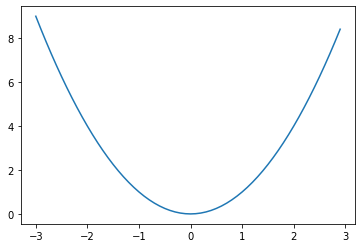

In [5]:
def function_x2(x):
    return x**2

_x = np.arange(-3, 3, 0.1)
_y = function_x2(_x)
plt.plot(_x, _y)

3개의 그래프를 그려보겠습니다.

- $\eta = 0.001$ 경우 : 경사 하강법 20회 반복
- $\eta = 0.1$ 경우 : 경사 하강법 20회 반복
- $\eta = 1.1$ 경우 : 경사 하강법 10회 반복



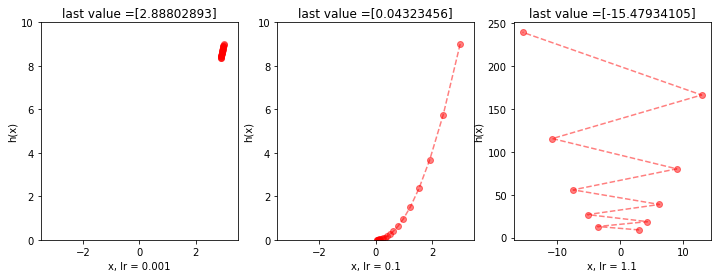

In [6]:
init_x = np.array([3.0])

plt.figure(figsize=(12,4))

plt.subplot(131)
lr = 1e-3
x, x_history = gradient_descent(function_x2, init_x, lr=lr)
plt.plot(x_history[:,0], function_x2(x_history[:,0]), 'ro--', alpha=0.5)
plt.xlim(-3.5, 3.5)
plt.ylim(0, 10)
plt.xlabel("x, lr = "+str(lr))
plt.ylabel("h(x)")
plt.title('last value ='+str(x_history[-1]))

plt.subplot(132)
lr = 1e-1
x, x_history = gradient_descent(function_x2, init_x, lr=lr)
plt.plot(x_history[:,0], function_x2(x_history[:,0]), 'ro--', alpha=0.5)
plt.xlim(-3.5, 3.5)
plt.ylim(0, 10)
plt.xlabel("x, lr = "+str(lr))
plt.ylabel("h(x)")
plt.title('last value ='+str(x_history[-1]))

plt.subplot(133)
lr = 1.1
x, x_history = gradient_descent(function_x2, init_x, lr=1.1, iter=10)
plt.plot(x_history[:,0], function_x2(x_history[:,0]), 'ro--', alpha=0.5)
plt.xlabel("x, lr = "+str(lr))
plt.ylabel("h(x)")
plt.title('last value ='+str(x_history[-1]))

plt.show()


학습률이 너무 작거나 크면 제대로 학습이 이루어지지 않는 것을 확인했습니다.     
경사 하강법을 사용할 때는 학습률을 적정한 값으로 설정하는 것이 필요합니다.

#### 학습 알고리즘

신경망을 사용한 학습은 다음 과정을 거치게 됩니다.

- 학습 프로세스
    1. 신경망을 준비한다(신경망에는 가중치와 편향 매개변수가 있다).
    1. 훈련 데이터를 신경망에 통과시키고 손실 값을 얻는다.
    1. 각 가중치와 편향 매개 변수의 기울기를 얻는다.
    1. 손실 값이 작아지는 방향으로 가중치와 편향 매개변수를 조정한다.
    1. 반복한다.

위의 내용을 반복하면서 가중치와 편향 매개변수를 조정해서 손실 값을 최소로 만드는 것이 신경망이 하는 일입니다.

### 2. 오차 역전파

#### 오차 역전파

신경망 학습을 위해서는 가중치와 편향 매개 변수를 조정하기 위한 기울기를 아는 것이 필수입니다.     

기울기를 알아내기 위한 고전적인 방법은 **수치미분**을 사용하는 것이었습니다.     
하지만 수치미분 방식은 계산량이 지나치게 많아져서 시간이 오래 걸린다는 치명적인 단점이 있습니다. 이 때문에 한동안 '신경망'이 인공지능 분야의 연구에서 소홀히 되기도 했습니다. 하지만 '오차 역전파'알고리즘이 등장하면서 분위기가 바뀝니다. 

오차 역전파는 수치미분을 사용하지 않고 기울기를 구하는 알고리즘입니다. 

신경망 학습을 위해서 꼭 필요한 기울기를 구하는 방법으로 수치미분 외에 다른 빠른 알고리즘인 오차 역전파가 등장하면서 다시 한번 '신경망'이 기계 학습 분야에 중요한 자리를 차지하게 됩니다.





#### 계산 그래프 

오차 역전파를 이해하기 위해서 수식과 함께 계산 그래프를 사용하도록 하겠습니다. 계산 그래프는 오픈된 수업인 스탠퍼드 대학의 [CS213n](http://cs231n.stanford.edu/)을 참고하였습니다.

계산 그래프는 계산 과정을 그래프로 나타낸 것입니다. 노드(node)와 간선(edge)으로 표현된 그래프를 통해 간단한 계산식을 만들어 보겠습니다.

카페를 창업하는 길동은 커피머신, 테이블, 의자, 커피잔 등을 구매하려고 합니다. 각각 적당한 개수를 구입하고 총 구매비용의 10%는 세금으로 처리합니다.



100만 원 커피머신 2개, 5만 원 테이블 5개, 3만 원 의자 15개, 1만 원 컵 20개를 구매하고 세금 10%를 고려하면 합계 비용은 319만 원이 듭니다.

<br><br>
<center>
<!-- <img src="img/2-1-1.png" width="40%" height="40%"></img> -->
<img src="img/2-1-3.png" width="70%" height="70%"></img>
</center>
<br><br>

여기서 +기호와 x기호가 있는 동그라미를 '노드'라고 하고 노드와 노드를 잇는 선을 '간선'이라고 표현합니다. 노드와 간선으로 표현된 그래프를 이용하여 전체의 흐름을 한눈에 볼 수 있게 나타내었습니다. 




- 커피머신 100 x 2개 = 200  $\rightarrow$ (1) 
- 테이블 5 x 5개 = 25  $\rightarrow$ (2) 
- 의자 3 x 15 = 45  $\rightarrow$ (3) 
- 컵 1 x 20 = 20  $\rightarrow$ (4)     


- (1) + (2) = 225   $\rightarrow$ (5)     
- (5) + (3) = 270   $\rightarrow$ (6)     
- (6) + (4) = 290   $\rightarrow$ (7)     

- (7) x 1.1 = 319   (최종 결과)


##### 덧셈 노드

하나의 노드에 대해서만 표현하면 다음과 같습니다. 맨 윗줄, 첫 번째 덧셈 노드를 살펴보겠습니다.     
100만 원 커피머신 2대 가격인 `200`만 원과 5만 원 테이블 5개 가격인 `25`만 원을 더하는 부분입니다.

<br><br>
<center>
<img src="img/2-1-4.png" width="40%"></img>
</center>
<br><br>

덧셈 노드는 노드로 들어오는 값들의 합이 출력됩니다.

이를 수식으로 나타내면 다음과 같습니다.

>$$
f(x, y) = x + y
$$

덧셈에 대한 미분은 다음과 같습니다.

>$$
{\partial f \over \partial x } = 1 , \; \; {\partial f \over \partial y } = 1
$$

미분 값을 덧셈 노드에 표현하면 다음과 같습니다. 

<br><br>
<center>
<img src="img/2-1-5.png" width="40%"></img>
</center>
<br><br>


각 노드의 검은색 화살표는 앞에서 뒤로 가는 방향을 가지고 있으며 이를 '순방향'이라고 부릅니다. 반대로 뒤에서 앞으로 거꾸로 오는 파란색 화살표는 '역방향'입니다. 역방향 화살표의 아래에 적힌 숫자는 미분 값 즉, 기울기를 의미합니다.    

덧셈 노드에 들어가는 순방향 `200`, 역뱡향 `1`로 적힌 부분에서 `1`의 의미는 `200`의 값이 `1`만큼 바뀔 때 결과가 바뀌는 정도를 의미합니다. 즉, 입력값이 `200`에서 `201`로 `1`만큼 증가하면 결과는 `225`에서 `226`으로 `1`만큼 증가하게 됩니다. 즉, 덧셈 노드에서는 입력의 증가 정도가 출력의 증가 정도와 동일한 값을 가지게 됩니다.



##### 곱셈 노드

곱셈 노드와 같은 방식으로 표현하면 다음과 같습니다. 

<br><br>
<center>
<img src="img/2-1-6.png" width="40%"></img>
</center>
<br><br>

곱셈 노드에 대한 미분은 다음과 같습니다.

>$$
f(x, y) = xy \\[10pt]
{\partial f \over \partial x} = y, \; \; {\partial f \over \partial y} = x
$$

곱셈 노드에 대한 미분 값을 그래프로 표현하면 다음과 같습니다.

<br><br>
<center>
<img src="img/2-1-7.png" width="40%"></img>
</center>
<br><br>


곱셈 노드에 들어가는 순방향 `100`, 역뱡향 `2`로 적힌 부분에서 `2`의 의미는 100의 값이 1만큼 바뀔 때 결과가 바뀌는 정도를 의미합니다. 즉, 입력값이 `100`에서 `101`로 `1`만큼 증가하면 결과는 `200`에서 `202`로 `2`만큼 증가하게 됩니다. 여기서 `2`는 곱셈 노드에 들어가는 다른 입력값을 의미합니다. f를 x에 대해서 미분하면 y가 나오고, f를 y에 대해서 미분하면 x가 나옵니다. 

##### 체인룰

역전파는 기울기를 알기 위해서 모든 과정을 전체로 분석하는 것이 아니라 개별 과정을 노드와 간선으로 나누어서 분석한 다음 그 결과를 합치는 방식으로 계산이 진행됩니다. 이를 체인룰(Chain rule), 연쇄 법칙이라고 불립니다.

$z = (x+y)^2$ 은 아래의 두 식으로 구성됩니다.

>$$
z = t^2 \\
t = x+y
$$

여기서 $\partial z \over \partial x$는  $\partial z \over \partial t$와  $\partial t \over \partial x$의 곱으로 표현할 수 있습니다.   

>$$
{\partial z \over \partial x} =  {\partial z \over \partial t}   {\partial t \over \partial x} 
$$

노드와 노드로 연결되는 계산 그래프는 이전 노드 연산의 결과가 다음 노드 연산의 입력으로 들어가며 이때 체인룰이 적용됩니다.


입력 x가 들어와서 두 개의 노드를 거치면서 t와 z로 변화합니다.

><center>$f(x) = t ~~~~~~~~ g(t) = z$ </center>

<br><center><img src="img/2-1-21.png" width="40%"></img></center><br>


두 노드에 대한 기울기는 다음과 같습니다.

>$$\begin{aligned}
&f(x) = t    &&g(t) = z           \\
 &{\partial f(x) \over \partial x} =  {\partial t \over \partial x}
&&{\partial g(t) \over \partial t} =  {\partial z \over \partial t}    \\
\end{aligned}
$$

<br><center><img src="img/2-1-22.png" width="80%"></img></center><br><br>


<br>
<center><img src="img/2-1-23.png" width="50%"></img></center><br>

>$$
{\partial z \over \partial x} =  {\partial z \over \partial t}   {\partial t \over \partial x} 
$$

이제 전체 그래프에 대해서 기울기 값을 뒤에서 부터 계산해 보도록 하겠습니다.

<br><br>
<center>
<img src="img/2-1-8.png" width="80%"></img>
</center>
<br><br>



1. **가장 마지막 곱셈 노드**     
가장 뒤의 곱셈 노드는 순전파의 출력이 319, 입력이 290과 1.1입니다. 마지막 항목이므로 입력을 역전파의 입력은 1로 하고, 역전파의 출력인 기울기 값을 서로 항을 달리해서 들어온 입력의 값을 넣어줍니다. 즉, 순전파 **290** 입력 부분의 기울기는 **1.1**이고, 순전파 1.1 입력 부분의 기울기는 290입니다.


2. **끝에서 두번째 덧셈 노드**     
뒤에서 들어온 값인 1.1이 역전파의 입력이 되고, 순전파시 270 입력 부분의 기울기는 x1이 됩니다. 즉, 최종 역전파 출력은 **1.1**이 됩니다.


3. **끝에서 세번째 덧셈 노드**     
덧셈 노드의 역전파 시 기울기는 위와 같이 들어온 기울기 값과 동일한 값이므로 여전히 **1.1**을 기울기값으로 가집니다.


4. **마지막 줄 곱셈 노드**     
곱셈 노드의 역전파 입력은 1.1이고, 출력은 순전파 입력 부분의 다른 항의 값을 곱해서 순전파 1의 경우 역전파 기울기 1.1x20인 22를 가지고, 순전파 20의 경우 1x1.1인 1.1을 가집니다.




정리한 역전파 그래프를 그려보면 다음과 같습니다.


<br><br>
<center>
<img src="img/2-1-9.png" width="80%"></img>
</center>
<br><br>

최종적으로 표시한 빨간색 숫자는 미분 값인 기울기를 의미합니다.    
그리고 100만 원 커피머신의 기울기가 2.2라는 의미는 커피머신의 가격이 1만큼 증가하면 최종 결과는 2.2만큼 증가(319에서 321.1로 증가)한다는 것을 의미합니다. 

역전파 알고리즘을 사용하면 수치 미분을 사용하지 않고 각 변수의 기울기를 구할 수 있습니다. 이때 신경망에서 많이 사용하는 덧셈과 곱셈 노드에 대해서는 거의 연산이 이루어지지 않으면서 바로 값을 찾을 수 있습니다.     

역전파 알고리즘은 기존의 수치 미분 방식보다 반복적이고 재귀적이면서 매우 효율적인 방법입니다.  

덧셈 노드 계층을 구현해 보겠습니다.

In [7]:
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y
        return out

    def backward(self, dout):
        dx = dout;
        dy = dout
        return dx, dy

곱셈 노드를 구현해 보겠습니다.

In [8]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        return x * y

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy

구현한 두 노드를 이용해서 카페 창업 과정의 역전파를 진행합니다.

우선 커피머신, 테이블, 의자, 컵의 개당 가격과 수량을 입력합니다.

In [9]:
machine = 100
machine_num = 2
table = 5
table_num = 5
chair = 3
chair_num = 15
cup = 1
cup_num = 20
rate = 1.1


덧셈 노드와 곱셈 노드를 구현한 클래스를 이용하여 개별 노드를 객체로 만듭니다.

In [10]:
machinePrice = MulLayer()
tablePrice = MulLayer()
chairPrice = MulLayer()
cupPrice = MulLayer()

add1Price = AddLayer()
add2Price = AddLayer()
add3Price = AddLayer()
totalPrice = MulLayer()


9개의 노드는 forward()와 backward()함수를 가지게 되고, 이는 순전파와 역전파를 의미합니다.    
순전파에서는 2개의 입력과 1개의 출력 노드를 가지고, 역전파에서는 1개의 입력 노드와 2개의 출력 노드를 가집니다.     
순전파를 진행합니다. 이때 입력으로 들어온 값은 역전파에서 사용하기 위해 별도로 저장됩니다.


In [11]:
machine_price = machinePrice.forward(machine, machine_num)
table_price = tablePrice.forward(table, table_num)
chair_price = chairPrice.forward(chair, chair_num)
cup_price = cupPrice.forward(cup, cup_num)

add1_price = add1Price.forward(machine_price, table_price)
add2_price = add2Price.forward(add1_price, chair_price)
add3_price = add3Price.forward(add2_price, cup_price)

total_price = totalPrice.forward(add3_price, rate)

# 순전파 결과 출력 
print('machine_price, table_price, chair_price, cup_price = ')
print(machine_price, table_price, chair_price, cup_price)
print('add1_price, add2_price, add3_price, total_price = ')
print(add1_price, add2_price, add3_price, total_price)

machine_price, table_price, chair_price, cup_price = 
200 25 45 20
add1_price, add2_price, add3_price, total_price = 
225 270 290 319.0


역전파를 진행합니다.    
초기 기울기 값은 1이고, 순전파에서 진행되었던 과정을 역순으로 진행합니다. 
편의상 다음과 같은 구조로 만들었습니다.
 
```
# [순전파]
출력 = 객체이름.forward(입력1, 입력2)

# [역전파]
d입력1, d입력2 = 객체이름.backward(d출력)
```

In [12]:
# 역전파

dtotal_price = 1
dadd3_price, drate = totalPrice.backward(dtotal_price)

dadd2_price, dcup_price = add3Price.backward(dadd3_price)
dadd1_price, dchair_price = add2Price.backward(dadd2_price)
dmachine_price, dtable_price = add1Price.backward(dadd1_price)

dcup, dcup_num = cupPrice.backward(dcup_price)
dchair, dchair_num = chairPrice.backward(dchair_price)
dtable, dtable_num = tablePrice.backward(dtable_price)
dmachine, dmachine_num = machinePrice.backward(dmachine_price)

# 역전파 결과 출력 

# print(drate, dadd3_price, dadd2_price, dadd1_price)
# print(dmachine_price, dtable_price, dchair_price, dcup_price)
# print(dmachine, dmachine_num, dtable, dtable_num, dchair, dchair_num, dcup, dcup_num)

print('gradient of coffee machine =', dmachine)
print('gradient of coffee cup =', dcup)


gradient of coffee machine = 2.2
gradient of coffee cup = 22.0


##### 시그모이드 함수

시그모이드 함수를 사용하는 노드는 곱셈 노드나 덧셈 노드보다는 복잡합니다. 하지만 시그모이드 함수를 구성하는 각 과정을 다음과 같이 세분하여 구성하면 어렵지 않게 시그모이드 노드에 대한 역전파를 구할 수 있습니다.

<br><br>
<center>
<img src="img/2-1-11.png" width="80%"></img>
</center>
<br><br>

>$$
f(x) ={ 1 \over {1+e^{-x}} }
$$

f(x)는,  

1. out = x * (-1)
2. out = exp(out)
3. out = out + 1
4. out = 1 / out

위 과정을 거쳐 만들 수 있으며, 이를 거꾸로 거슬러 올라가면서 역전파를 수행할 수 있습니다.


<br><br>
<center>
<!-- <img src="img/2-1-1.png" width="40%" height="40%"></img> -->
<img src="img/2-1-12.png" width="80%"></img>
</center>
<br><br>




여기서 $y^2e^{-x}$은 다음과 같이 풀이할 수 있습니다.     

>$$\begin{aligned}
y^2e^{-x} 
&= {1 \over (1+e^{-x})^2} e^{-x} \\[10pt]
&= {1 \over 1+e^{-x}} {e^{-x} \over 1+e^{-x}} \\[10pt]
&= {1 \over 1+e^{-x}} \biggl( {1 + e^{-x} \over 1+e^{-x}} - {1 \over 1+e^{-x}} \biggr) \\[10pt]
&= y(1-y)
\end{aligned}
$$



<br><br>
<center>
<!-- <img src="img/2-1-1.png" width="40%" height="40%"></img> -->
<img src="img/2-1-13.png" width="40%"></img>
</center>
<br><br>

##### ReLU 함수

ReLU 함수의 역전파는 다음과 같습니다. $x>0$ 에서는 출력이 입력과 같은 항등함수이므로 기울기가 1이지만, $x\le0$ 이라면 기울기는 0이 됩니다.

<br><br>
<center>
<!-- <img src="img/2-1-1.png" width="40%" height="40%"></img> -->
<img src="img/2-1-14.png" width="70%"></img>
</center>
<br><br>

ReLU의 역전파를 구현해 보겠습니다.

In [13]:
class ReLU:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        result = x.copy()
        result[self.mask] = 0
        return result

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx

mask 변수를 사용해서 입력값이 0보다 큰지 아닌지 여부를 저장해 둡니다.     
mask 변수를 이용해서 역전파시에 들어온 값을 그대로 보내거나 혹은 0을 만들어 보냅니다.


순전파 입력을 x로 하고, 역전파 입력을 dout으로 하겠습니다.

In [14]:
# 순전파 입력과 역전파 입력
x = np.array([2.0, 3.0, -5.0])
dout = np.array([0.4, 0.8, -0.2])


순전파 함수 forward()와 역전파 함수 backward()를 사용할 때의 결과를 확인해 보겠습니다.

In [15]:
myrelu = ReLU()

out = myrelu.forward(x)
print('relu 입력 : ', x)
print('relu 출력 : ', out)

d1 = np.array([0.2, -0.2, 0.5])
d2 = myrelu.backward(dout)

print('relu 역전파 입력 : ', d1)
print('relu 역전파 출력 : ', d2)


relu 입력 :  [ 2.  3. -5.]
relu 출력 :  [2. 3. 0.]
relu 역전파 입력 :  [ 0.2 -0.2  0.5]
relu 역전파 출력 :  [0.4 0.8 0. ]


---

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>